
Most Frequent Weather-Cluster Combinations:
   support                                     itemsets
3    0.450             (description(output)_Few clouds)
0    0.375                                  (Cluster_0)
1    0.375                                  (Cluster_1)
2    0.250                                  (Cluster_2)
5    0.250  (Cluster_0, description(output)_Few clouds)
4    0.200        (description(output)_Overcast clouds)
6    0.200  (Cluster_2, description(output)_Few clouds)


<Figure size 1000x600 with 0 Axes>

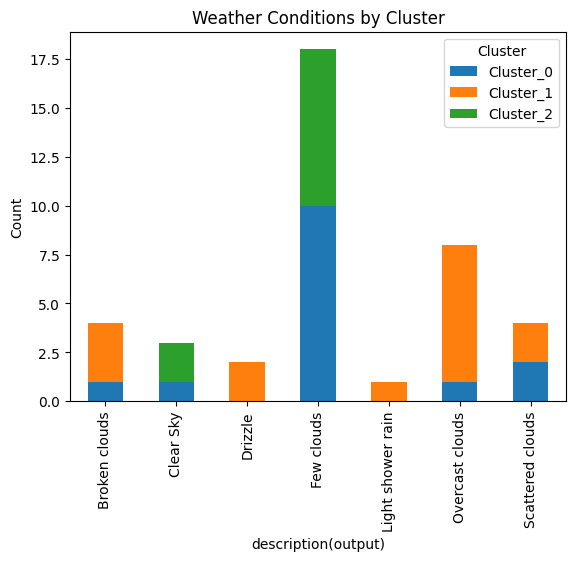

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('weather_data.csv')


original_data = data.copy()


le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])


X = data.copy()  


n_clusters = 3
agg_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean',
    linkage='ward'
)
clusters = agg_clustering.fit_predict(X)


original_data['Cluster'] = ['Cluster_'+str(i) for i in clusters]


categorical_cols = ['description(output)', 'wind_dir']  


transactions = []
for _, row in original_data.iterrows():
    transaction = []
    
    transaction.append(row['Cluster'])

    for col in categorical_cols:
        if col in row:
            transaction.append(f"{col}_{row[col]}")
    transactions.append(transaction)


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)





print("\nMost Frequent Weather-Cluster Combinations:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


plt.figure(figsize=(10, 6))
pd.crosstab(original_data['description(output)'], original_data['Cluster']).plot.bar(stacked=True)
plt.title('Weather Conditions by Cluster')
plt.ylabel('Count')
plt.show()

Original Transaction Data:
   Bread  Butter  Milk  Jam
0      1       1     0    0
1      0       1     1    0
2      1       1     1    1
3      1       0     1    1
4      0       0     1    1

Frequent Itemsets:
   support     itemsets
0      0.6      (Bread)
1      0.6     (Butter)
2      0.8       (Milk)
3      0.6        (Jam)
4      0.6  (Milk, Jam)

Association Rules:
  antecedents consequents  support  confidence  lift
0      (Milk)       (Jam)      0.6        0.75  1.25
1       (Jam)      (Milk)      0.6        1.00  1.25


C:\Users\Mithil Bhatt\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


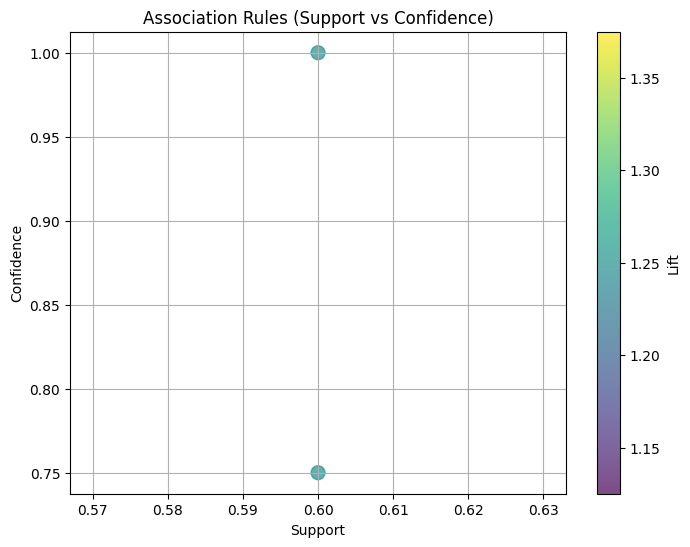

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Example data (transactions)
data = pd.DataFrame({
    'Bread': [1, 0, 1, 1, 0],
    'Butter': [1, 1, 1, 0, 0],
    'Milk': [0, 1, 1, 1, 1],
    'Jam': [0, 0, 1, 1, 1]
})

print("Original Transaction Data:")
print(data)

# Step 1: Apply Apriori
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Step 3: Visualization - Plot confidence vs lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis', s=100)
plt.colorbar(label='Lift')
plt.title('Association Rules (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
